In [36]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
%matplotlib inline

import seaborn as sns
# sns.set(style="ticks")

# Soft	Margin	Classification

In [37]:
iris = datasets.load_iris()
X = iris["data"][:,(2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [38]:
svm_clf = Pipeline((("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1,loss="hinge")),))
svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [39]:
svm_clf.predict([[5.5,1.7]])

array([ 1.])

In [40]:
svm_clf1 = Pipeline((("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=100,loss="hinge")),))
svm_clf1.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [41]:
svm_clf1.predict([[5.5,1.7]])

array([ 1.])

In [42]:
svm_predict=svm_clf.predict(X)

In [43]:
svm_predict1=svm_clf1.predict(X)

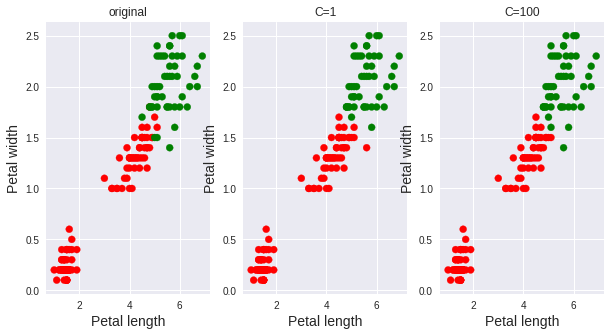

In [69]:
plt.figure(figsize=(10,5))
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['red', 'blue', 'green'])
plt.subplot(1,3,1)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.scatter(X[:, 0], X[:, 1],c = y, cmap= custom_cmap)
plt.title('original')
plt.subplot(1,3,2)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.scatter(X[:, 0], X[:, 1],c = svm_predict,cmap= custom_cmap)
plt.title('C=1')
plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1],c =svm_predict1,cmap= custom_cmap)
plt.title('C=100')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()

In [ ]:
# smaller c value leads to wider street but more margin violation
# high c value leads to makes fewer margin violations but end up with smaller margin

# Nonlinear	SVM	Classification

In [86]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
moons = make_moons(noise = 0.15,random_state = 42)
X=moons[0]
y=moons[1]

In [97]:
polynomial_svm_clf = Pipeline((
                            ("poly_features", PolynomialFeatures(degree=3)),
                            ("scaler", StandardScaler()),
                            ("svm_clf", LinearSVC(C=100, loss="hinge"))
                            ))
polynomial_svm_clf.fit(X,y)
p=polynomial_svm_clf.predict(X)

In [46]:
# here classification is done by adding more features using polynomial features
# By adding the ploynomial features the dataset can be linearly separable

In [100]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['blue', 'green'])
plt.scatter(X[:, 0], X[:, 1],c=y,cmap= custom_cmap)
plt.title('original')
plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1],c=p,cmap= custom_cmap)
plt.title('c=100')
plt.show()

In [101]:
# after adding the polynomial features

# Polynomial Kernel

In [47]:
from sklearn.svm import SVC
polynomial_svm_clf1 = Pipeline((
                            ("scaler", StandardScaler()),
                           ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
                            ))
polynomial_svm_clf1.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [82]:
poly_predict=polynomial_svm_clf1.predict(X)

In [48]:
# low polynomial degree cannot deal with complex datasets
# increasing the polynomial degree creates a huge no of features and makes the model slow
# fitting of the model can be adjusted based on the the polynomial degreee
 # 1.If the model is overfitting we can reduce the polynomial degree
 # 2.If the model is underfitting we can increase the polynomial degree

In [49]:
polynomial_svm_clf1.predict([[1,2]])

array([ 0.])

# Rbf Kernel

In [50]:
rbf_kernel_svm_clf=Pipeline((
                            ("scaler", StandardScaler()),
                           ("svm_clf", SVC(kernel='rbf',gamma=5, C=0.001))
                            ))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [51]:
# fitting of the model can be adjusted based on the the gamma value
 # If the model is overfitting we can reduce the gamma value
 # If the model is underfitting we can increase the gamma value
# here gamma acts as regularistion hyperparameter
# small gamma value makes the bell shape curve wider

In [52]:
# String kernels can also be used when classifying text documents etc...,

# SVM Regression

In [53]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [75]:
svm_reg_predict=svm_reg.predict(X)

# using kernel in SVM Regression

In [54]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly",degree=2,C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)